In [5]:
import pandas as pd
import os

#Read .csv files from folder 
path = '/Users/rodneysmith/Documents/SchoolProjects/DataMining/CFB Data 2013 - 2023'
dataframes = []

for filename in os.listdir(path):
    if filename.endswith(".csv"):
        file_path = os.path.join(path, filename)
        combined_df = pd.read_csv(file_path)
        dataframes.append(combined_df)

        print(combined_df.head(100))

                          Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0              Air Force (MWC)     12    5     7        52        882   
1                  Akron (MAC)     12    4     8       126        764   
2                Alabama (SEC)     15   14     1         6       1009   
3   Appalachian St. (Sun Belt)     13   11     2        37        859   
4             Arizona (Pac-12)     12    5     7        24        881   
..                         ...    ...  ...   ...       ...        ...   
95      Southern Miss. (C-USA)     11    6     5        99        788   
96           Stanford (Pac-12)     13    9     4        85        808   
97              Syracuse (ACC)     13   10     3        19       1063   
98                TCU (Big 12)     13    7     6        98        904   
99                Temple (AAC)     13    8     5        60        937   

    Off.Yards  Off.Yards.Play  Off.TDs  Off.Yards.per.Game  ...  \
0        4978            5.64       43               414

In [13]:
#Checking for nulls
combined_df.isna().sum()

Team                            0
Games                           0
Win                             0
Loss                            0
Off.Rank                        0
                               ..
Fumbles.Lost                    0
Interceptions.Thrown.y          0
Turnovers.Lost                  0
Turnover.Margin                 0
Avg.Turnover.Margin.per.Game    0
Length: 152, dtype: int64

In [14]:
#Checking for duplicates
combined_df.duplicated().sum()

np.int64(0)

In [15]:
# slicing data
CFBwin_df = combined_df[['Win','Loss','Points.Per.Game','Turnovers.Gain','Turnover.Rank','Penalty.Yards','Yards.Per.Game.Allowed','Feild.Goals']]

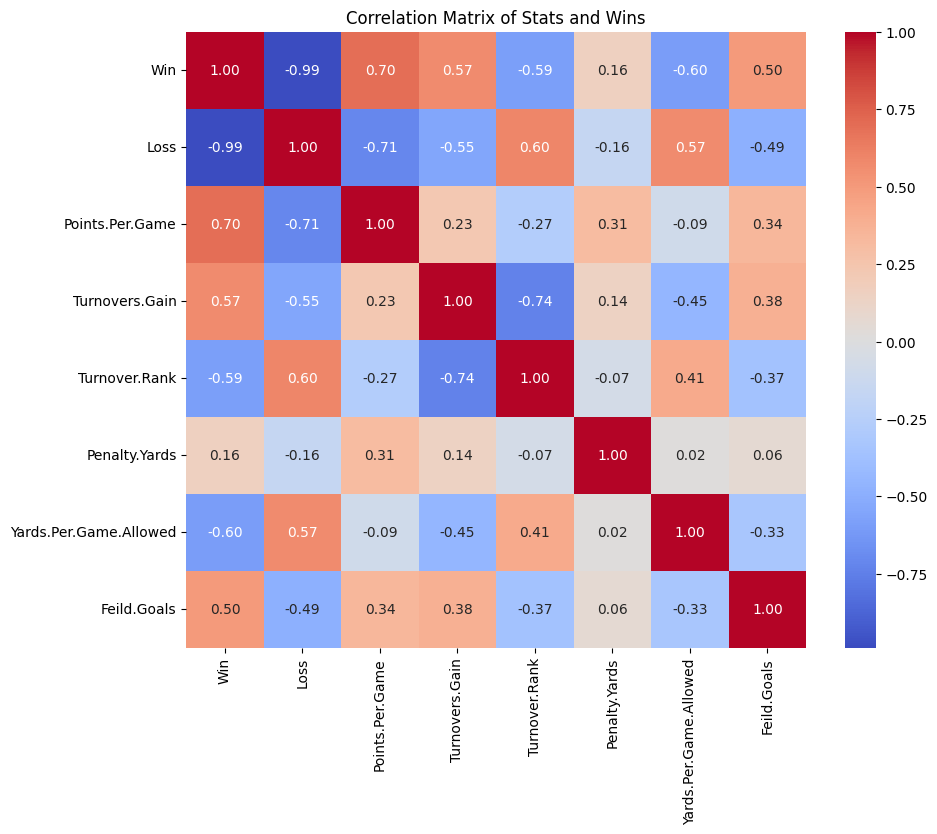

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = CFBwin_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stats and Wins')
plt.show()


In [68]:
# slicing data
CFBsuccess_df = combined_df[['Win','Def.Rank','Yards.Per.Game.Allowed','Turnover.Rank','Turnovers.Gain','Tackle.For.Loss.Per.Game','Turnover.Margin','Redzone.Points.Allowed','Scoring.Def.Rank']]

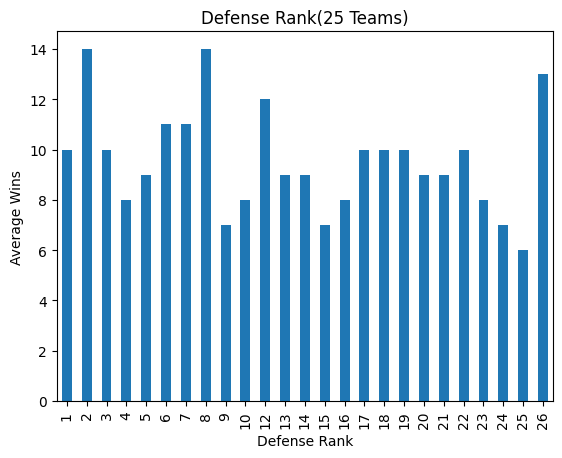

/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_2498/674531849.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CFBsuccess_df['Yards.Binned'] = pd.cut(CFBsuccess_df['Yards.Per.Game.Allowed'], bins=bins, labels=labels)
/var/folders/wp/_md01_w96yl1j67nw99z0_5m0000gn/T/ipykernel_2498/674531849.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wins_by_yards_bin = CFBsuccess_df.groupby('Yards.Binned')['Win'].mean()


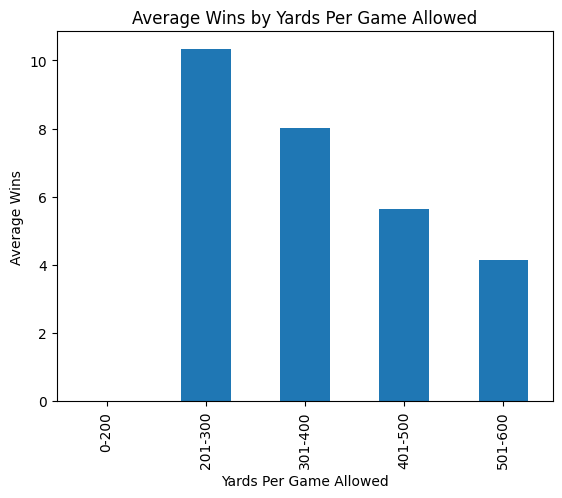

In [69]:
import matplotlib.pyplot as plt

avg_wins_by_def_rank = CFBsuccess_df.groupby('Def.Rank')['Win'].mean().head(25)

avg_wins_by_def_rank.plot(kind='bar')
plt.title('Defense Rank(25 Teams)')
plt.xlabel('Defense Rank')
plt.ylabel('Average Wins')
plt.show()


bins = [0, 200, 300, 400, 500, 600]
labels = ['0-200', '201-300', '301-400', '401-500', '501-600']
CFBsuccess_df['Yards.Binned'] = pd.cut(CFBsuccess_df['Yards.Per.Game.Allowed'], bins=bins, labels=labels)
avg_wins_by_yards_bin = CFBsuccess_df.groupby('Yards.Binned')['Win'].mean()
avg_wins_by_yards_bin.plot(kind='bar')
plt.title('Average Wins by Yards Per Game Allowed')
plt.xlabel('Yards Per Game Allowed')
plt.ylabel('Average Wins')
plt.show()



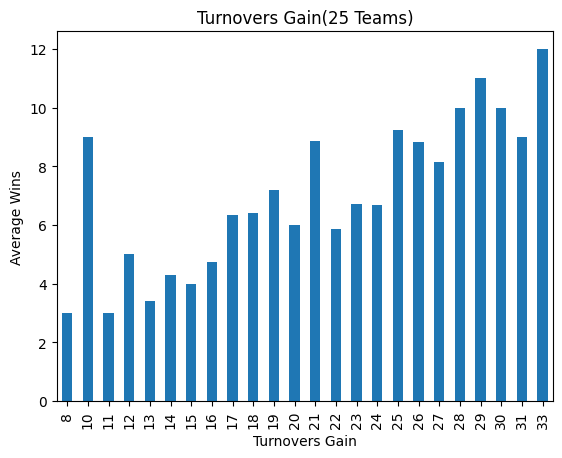

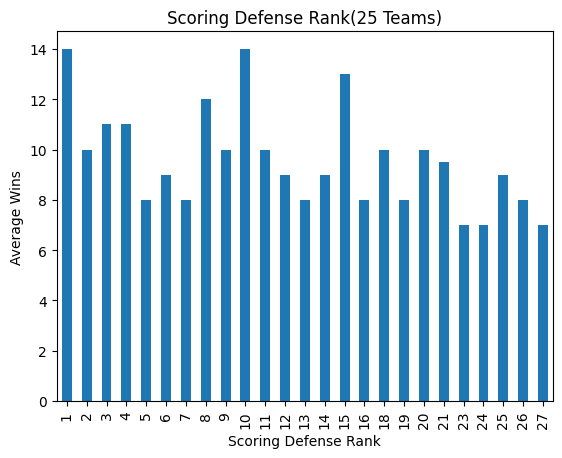

In [75]:
import matplotlib.pyplot as plt

avg_wins_by_turnovers = CFBsuccess_df.groupby('Turnovers.Gain')['Win'].mean().head(25)

avg_wins_by_turnovers.plot(kind='bar')
plt.title('Turnovers Gain(25 Teams)')
plt.xlabel('Turnovers Gain')
plt.ylabel('Average Wins')
plt.show()


avg_wins_by_scoring_def_rank = CFBsuccess_df.groupby('Scoring.Def.Rank')['Win'].mean().head(25)

avg_wins_by_scoring_def_rank.plot(kind='bar')
plt.title('Scoring Defense Rank(25 Teams)')
plt.xlabel('Scoring Defense Rank')
plt.ylabel('Average Wins')
plt.show()